Класифікація датсету

https://archive.ics.uci.edu/ml/datasets/glass+identification

Задача - усунення дисбалансу і перевірка впливу на точність моделі

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [29]:
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]
data = pd.read_csv("../glass+identification/glass.data", header=None, names=columns)
X = data.iloc[:, 1:-1]  # Ознаки
y = data.iloc[:, -1]    # Цільова змінна
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [30]:
# Розділити дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Функція для візуалізації розподілу класів
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel('Класи')
    plt.ylabel('Кількість зразків')
    plt.show()

Оцінка без обробки дисбалансу:
Точність: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



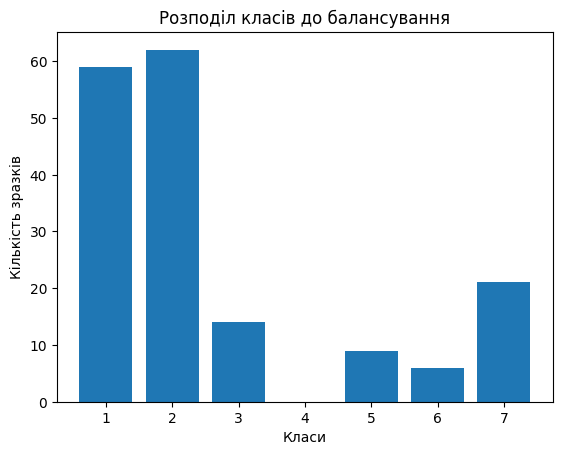

In [32]:
# Без обробки дисбалансу
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Оцінка без обробки дисбалансу:")
print(f"Точність: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Візуалізація розподілу класів до балансування
plot_class_distribution(y_train, 'Розподіл класів до балансування')

In [33]:
# Підвищення вибірки за допомогою SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


Оцінка після підвищення вибірки:
Точність: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.92      0.79      0.85        14
           3       0.40      0.67      0.50         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.84      0.84      0.83        43
weighted avg       0.86      0.84      0.84        43



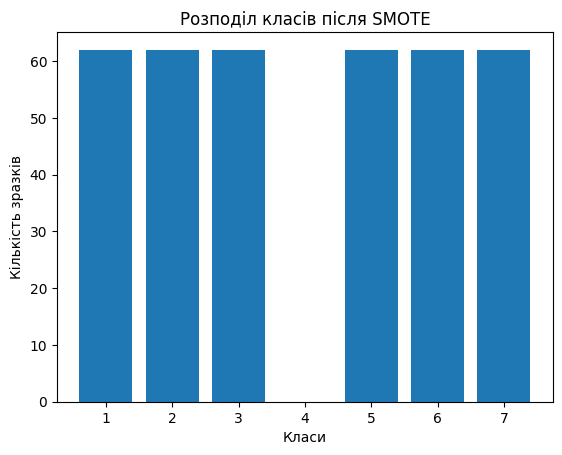

In [34]:
# Модель після підвищення вибірки
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nОцінка після підвищення вибірки:")
print(f"Точність: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Візуалізація розподілу класів після балансування
plot_class_distribution(y_resampled, 'Розподіл класів після SMOTE')

In [35]:
# Зменшення вибірки за допомогою RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)


Оцінка після зменшення вибірки:
Точність: 0.7209302325581395
              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.88      0.50      0.64        14
           3       0.43      1.00      0.60         3
           5       1.00      1.00      1.00         4
           6       0.60      1.00      0.75         3
           7       0.78      0.88      0.82         8

    accuracy                           0.72        43
   macro avg       0.73      0.84      0.75        43
weighted avg       0.77      0.72      0.72        43



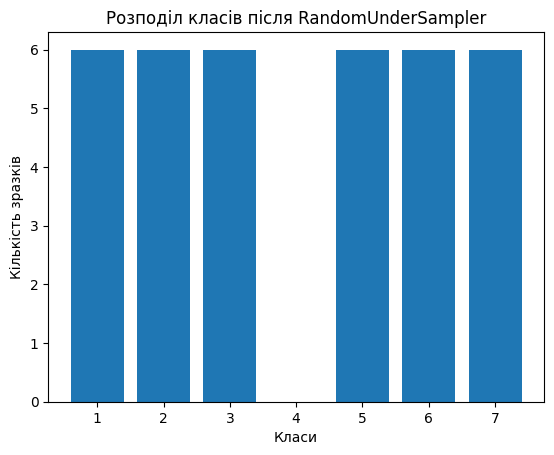

In [36]:
# Модель після зменшення вибірки
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\nОцінка після зменшення вибірки:")
print(f"Точність: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
# Візуалізація розподілу класів після зменшення вибірки
plot_class_distribution(y_resampled, 'Розподіл класів після RandomUnderSampler')


Оцінка за допомогою пайплайну:
Точність: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.92      0.79      0.85        14
           3       0.40      0.67      0.50         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.84      0.84      0.83        43
weighted avg       0.86      0.84      0.84        43



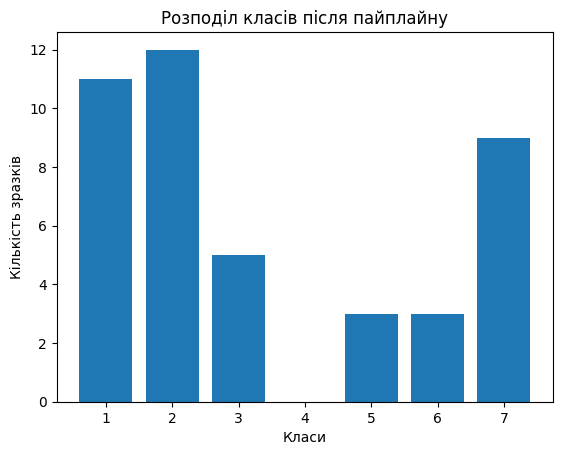

In [37]:
# Пайплайн з обробкою дисбалансу та моделюванням
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nОцінка за допомогою пайплайну:")
print(f"Точність: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Візуалізація розподілу класів після зменшення вибірки
plot_class_distribution(y_pred, 'Розподіл класів після пайплайну')